###  Herunterladen des Trainings- und Tesdatensatzes

In [1]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

### Beispiel aus Trainingsdatensatz

6


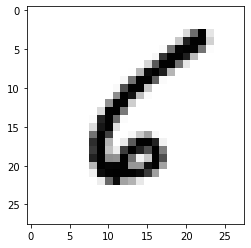

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
image_index = 3537 # You may select anything up to 60,000
print(y_train[image_index]) # The label is 3
plt.imshow(x_train[image_index], cmap='Greys')
plt.show()

### Format Trainingsdatensatz

In [3]:
x_train.shape

(60000, 28, 28)

### Reshapen und Normalisieren der Daten

In [4]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


### Erstellen des neuronalen Netzes

In [5]:
# Importing the required Keras modules containing model and layers
import logging
logging.getLogger('tensorflow').disabled = True
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

Using TensorFlow backend.


### Definition der Hyperparameter und Training

In [6]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 14s 232us/step - loss: 0.2075 - acc: 0.9375
Epoch 2/5
60000/60000 [==============================] - 12s 202us/step - loss: 0.0814 - acc: 0.9755
Epoch 3/5
60000/60000 [==============================] - 12s 204us/step - loss: 0.0574 - acc: 0.9818
Epoch 4/5
60000/60000 [==============================] - 12s 204us/step - loss: 0.0424 - acc: 0.9866
Epoch 5/5
60000/60000 [==============================] - 12s 200us/step - loss: 0.0340 - acc: 0.9892


### Performance des Netzes

In [7]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 74us/step


[0.05941877508801699, 0.9835]

### Beispiele korrekt prädizierter Werte

Prädizierter Wert: 9
Richtiger Wert: 9


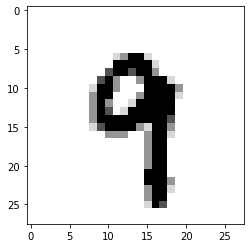

In [8]:
image_index = 3538
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
true_value = y_test[image_index]

print('Prädizierter Wert: ' + str(pred.argmax()))
print('Richtiger Wert: ' + str(true_value) )

Prädizierter Wert: 2
Richtiger Wert: 2


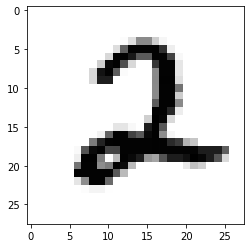

In [9]:
image_index = 3223
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
true_value = y_test[image_index]

print('Prädizierter Wert: ' + str(pred.argmax()))
print('Richtiger Wert: ' + str(true_value) )

### Beispiel eines Fehlerfalls

Prädizierter Wert: 8
Richtiger Wert: 2


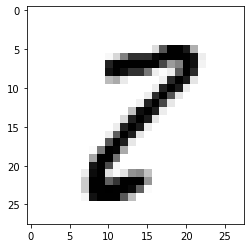

In [10]:
true = 1
pred = 1
count = 10000
while true == pred:
    count -= 1
    predict = model.predict(x_test[count].reshape(1, 28, 28, 1))
    pred = predict.argmax()
    true = y_test[count]
   
plt.imshow(x_test[count].reshape(28, 28),cmap='Greys')    
print('Prädizierter Wert: ' + str(pred))
print('Richtiger Wert: ' + str(true_value) )

In [11]:
#[1] KataKoda, https://www.katacoda.com/basiafusinska/courses/tensorflow-getting-started/tensorflow-mnist-beginner
#[2] CS231n Convolutional Neural Networks for Visual Recognition (http://cs231n.github.io/convolutional-networks/)
#[3] MathWorks, Introducing Deep Learning with MATLAB, https://www.mathworks.com/content/dam/mathworks/tag-team/Objects/d/80879v00_Deep_Learning_ebook.pdf
#[4] Wikipedia, MNIST database, https://en.wikipedia.org/wiki/MNIST_database